#### A/B Test Analysis

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
def calculate_sample_size(baseline_conv_rate, mde, alpha=0.05, power=0.8):
    """
    Calculate required sample size per variant.
    
    Parameters:
    - baseline_conv_rate: Current conversion rate
    - mde: Minimum detectable effect (relative change)
    - alpha: Significance level (default: 0.05)
    - power: Statistical power (default: 0.8)
    
    Returns:
    - Required sample size per variant
    """
    # Convert relative MDE to absolute
    absolute_mde = baseline_conv_rate * mde
    
    # Z-scores
    z_alpha = stats.norm.ppf(1 - alpha/2)
    z_beta = stats.norm.ppf(power)
    
    # Pooled probability
    p = baseline_conv_rate + absolute_mde/2
    
    # Sample size calculation
    n = 2 * ((z_alpha + z_beta)**2 * p * (1-p)) / (absolute_mde**2)
    
    return int(np.ceil(n))

In [10]:

def analyze_ab_test(control_visitors, control_conversions, 
                  treatment_visitors, treatment_conversions,
                  alpha=0.05):
    """
    Analyze A/B test results.
    
    Parameters:
    - control_visitors: Number of visitors in control
    - control_conversions: Number of conversions in control
    - treatment_visitors: Number of visitors in treatment
    - treatment_conversions: Number of conversions in treatment
    - alpha: Significance level (default: 0.05)
    
    Returns:
    - Dictionary with analysis results
    """
    # Conversion rates
    cr_control = control_conversions / control_visitors
    cr_treatment = treatment_conversions / treatment_visitors
    
    # Relative uplift
    relative_uplift = (cr_treatment - cr_control) / cr_control
    
    # Standard errors
    se_control = np.sqrt(cr_control * (1 - cr_control) / control_visitors)
    se_treatment = np.sqrt(cr_treatment * (1 - cr_treatment) / treatment_visitors)
    
    # Z-score for the difference in proportions
    se_diff = np.sqrt(se_control**2 + se_treatment**2)
    z_score = (cr_treatment - cr_control) / se_diff
    
    # P-value
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
    
    # Confidence interval
    ci_lower = (cr_treatment - cr_control) - stats.norm.ppf(1-alpha/2) * se_diff
    ci_upper = (cr_treatment - cr_control) + stats.norm.ppf(1-alpha/2) * se_diff
    
    # Significance
    is_significant = p_value < alpha
    
    return {
        "control_cr": cr_control,
        "treatment_cr": cr_treatment,
        "absolute_difference": cr_treatment - cr_control,
        "relative_uplift": relative_uplift,
        "z_score": z_score,
        "p_value": p_value,
        "ci_lower": ci_lower,
        "ci_upper": ci_upper,
        "is_significant": is_significant
    }

Required sample size per variant: 3123

A/B Test Results:
Control Conversion Rate: 12.00%
Treatment Conversion Rate: 36.00%
Absolute Difference: 24.00%
Relative Uplift: 200.00%
P-value: 0.000000
95% Confidence Interval: [20.41%, 27.59%]
Statistical Significance: Yes


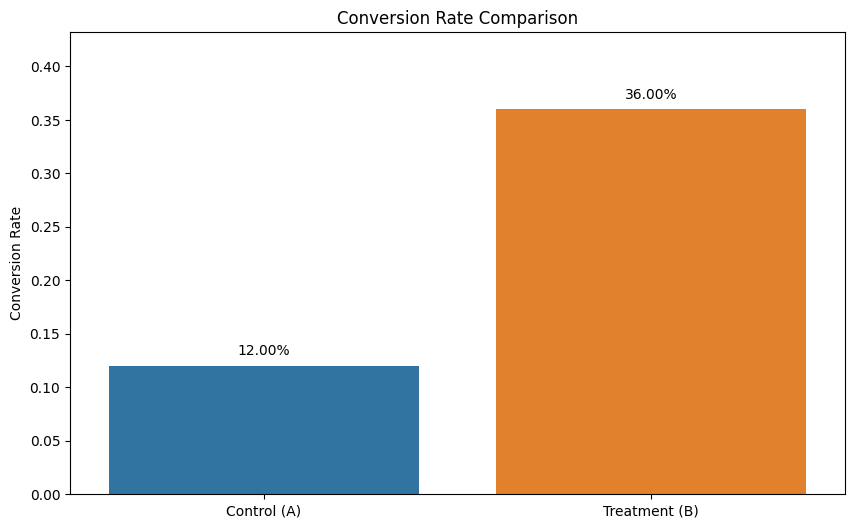

In [11]:
# Example usage
if __name__ == "__main__":
    # Sample size calculation
    baseline_cr = 0.12  # 12% conversion rate
    minimum_effect = 0.20  # 20% relative improvement
    
    sample_size = calculate_sample_size(baseline_cr, minimum_effect)
    print(f"Required sample size per variant: {sample_size}")
    
    # Analyze test results
    # Example: A/B test from the image (12% vs 36%)
    control_visitors = 1000
    control_conversions = 120  # 12% conversion rate
    treatment_visitors = 1000
    treatment_conversions = 360  # 36% conversion rate
    
    results = analyze_ab_test(control_visitors, control_conversions, 
                           treatment_visitors, treatment_conversions)
    
    # Print results
    print("\nA/B Test Results:")
    print(f"Control Conversion Rate: {results['control_cr']:.2%}")
    print(f"Treatment Conversion Rate: {results['treatment_cr']:.2%}")
    print(f"Absolute Difference: {results['absolute_difference']:.2%}")
    print(f"Relative Uplift: {results['relative_uplift']:.2%}")
    print(f"P-value: {results['p_value']:.6f}")
    print(f"95% Confidence Interval: [{results['ci_lower']:.2%}, {results['ci_upper']:.2%}]")
    print(f"Statistical Significance: {'Yes' if results['is_significant'] else 'No'}")

    # Visualize results
    labels = ['Control (A)', 'Treatment (B)']
    conv_rates = [results['control_cr'], results['treatment_cr']]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=labels, y=conv_rates)
    plt.title('Conversion Rate Comparison')
    plt.ylabel('Conversion Rate')
    plt.ylim(0, max(conv_rates) * 1.2)
    
    # Add conversion rate labels
    for i, rate in enumerate(conv_rates):
        plt.text(i, rate + 0.01, f"{rate:.2%}", ha='center')
        
    plt.show()